In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import scipy

In [2]:
score1 = pd.read_csv("../profiles/users_questions_scores.csv", encoding='latin1')
score=score1.as_matrix(columns=score1.columns[1:])

In [3]:
question_count = pd.read_csv("../profiles/users_question_count.csv", encoding='latin1')
count=question_count.as_matrix(columns=question_count.columns[1:])

In [6]:
sum_array=score.sum(axis=1)
count_array=count.sum(axis=1)

'''
#REMOVING THE OUTLIER
b=27387
index1=np.where(count_array==b)[0][0]
c=88574
index2=np.where(sum_array==c)[0][0]

outlier_free_count=np.delete(count_array,[index1,index2])

outlier_free_sum=np.delete(sum_array,[index1,index2])
print(len(outlier_free_count))
print(len(outlier_free_sum))
#sorted_list=-np.sort(-outlier_free_sum)
#print(sorted_list)

#print(sorted_list[-1])
#sorted_count=-np.sort(-outlier_free_count)
#print(sorted_count)
'''

'\n#REMOVING THE OUTLIER\nb=27387\nindex1=np.where(count_array==b)[0][0]\nc=88574\nindex2=np.where(sum_array==c)[0][0]\n\noutlier_free_count=np.delete(count_array,[index1,index2])\n\noutlier_free_sum=np.delete(sum_array,[index1,index2])\nprint(len(outlier_free_count))\nprint(len(outlier_free_sum))\n#sorted_list=-np.sort(-outlier_free_sum)\n#print(sorted_list)\n\n#print(sorted_list[-1])\n#sorted_count=-np.sort(-outlier_free_count)\n#print(sorted_count)\n'

In [7]:

temp=[]
list_of_usersum=[]
for i in range(0,len(count_array)):
    temp.append(count_array[i])
    temp.append(sum_array[i])
    list_of_usersum.append(temp)
    temp=[]

In [8]:
user_profile_array=np.array(list_of_usersum)
print(user_profile_array)
#print(np.any(np.isnan(user_sum_array)))
#print(-np.sort(-user_sum_array))
#print(np.max(user_sum_array,axis=0))

[[  26.  137.]
 [   8.  201.]
 [  50.  386.]
 ..., 
 [   2.    2.]
 [   0.    0.]
 [   0.    0.]]


In [9]:
def gonzalez(upInputMatrix,k):
    #print(k)
    #print(type(upInputMatrix))
    c=[upInputMatrix[0]]
    
    phi=[0]*len(upInputMatrix)
    print("Hi I am length",len(upInputMatrix))
    for i in range(1,k):
      
        m=0
        c.insert(i,upInputMatrix)
        
        for j in range(1,len(upInputMatrix)):
            
            if distance(upInputMatrix[j],c[phi[j]])>m:
                m=distance(upInputMatrix[j],c[phi[j]])
                c[i]=upInputMatrix[j]

        
        for j in range(1,len(upInputMatrix)):
            #print("Hi i am here")
            if distance(upInputMatrix[j],c[phi[j]])>distance(upInputMatrix[j],c[i]):
                phi[j]=i
                
    return c,phi


def distance(pt1,pt2):
    return math.sqrt(math.pow(pt1[0]-pt2[0],2)+math.pow(pt1[1]-pt2[1],2))

Hi I am length 630910


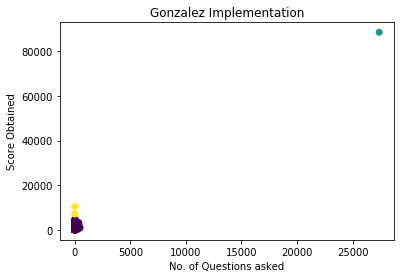

In [11]:
c1,phi=gonzalez(user_profile_array,3)
plt.xlabel("No. of Questions asked")
plt.ylabel("Score Obtained")
plt.title("Gonzalez Implementation")
plt.scatter(user_profile_array[:,0],user_profile_array[:,1],c=phi)
plt.show()   

In [12]:
def k_means(inputMatrix,k):
    
    print(np.any(np.isnan(inputMatrix)))
    print(np.any(np.isfinite(inputMatrix)))

    
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(inputMatrix)
    y_kmeans=kmeans.predict(inputMatrix)
    
    plt.xlabel("No. of Questions asked")
    plt.ylabel("Score Obtained")

    plt.title("k-means Implementation")

    plt.scatter(inputMatrix[:, 0], inputMatrix[:, 1], c=y_kmeans, s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)
    plt.show()

False
True


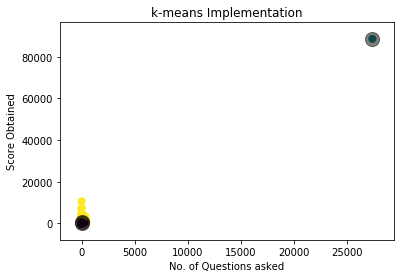

In [13]:
k_means(user_profile_array,3)